In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


In [2]:
#공부할때는 DNN, 감을 잡고나서는 CNN
data = datasets.load_digits()

X_data = data.images
y_data = data.target


print(data.images.shape)

#계산의 효율성을 위해서 4차원으로 변환
#흑백이냐, RGB냐가 문제가 아니다. 필터 수만큼 쌓인다. R, G, B 3개 + 전체 샘플수, 샘플수, 영상의 크기 2개, 채널수
#모든 층에는 (샘플개수, 필터수)

X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))  # 3차원 -> 4차원, 맨마지막 1이 4차원

y_data = to_categorical(y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)
#random_state를 사용하면, seed 값을 중심으로 한다. 별 조건 없으면, 계속 동일한 난수를 생성한다. 큰의미는 없다.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1797, 8, 8)
(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [3]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a)
b = a.reshape(3, 2, 1)
print(b.shape)
print(b)

b[:, :, 0]

[[1 2]
 [3 4]
 [5 6]]
(3, 2, 1)
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]


array([[1, 2],
       [3, 4],
       [5, 6]])

In [19]:
model = Sequential()
#x_data.shape[1], x_data.shape[2], x_data.shape[3], 8, 8, 1
#model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]),
               #  filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
    
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]),
                 filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#DNN과의차이
model.add(Flatten())

model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model.summary()
#param : 일단, 첫단계에서 구해야하는 파라미터 개수가 100개, 커널사이즈 3*3 짜리 10개  * 10 + 10 = 100
#각 필터마다 바이어스가 있다. param = 필터수 * 크기, 0인건 파라미터 있는 애들이 아닌것
#신경망의 노드수가 50개, 마지막 계층에는 10개
#4*4짜리 output 10개 = 160, 160 * 50 + 50 = 8050, 50 * 10 + 10
#샘플개수 몇개인지 모르니 None, 크기, 크기, 필터수
#샘플개수, 필터수
#160차원의 데이터

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 8, 8, 10)          100       
_________________________________________________________________
activation_14 (Activation)   (None, 8, 8, 10)          0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                8050      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 8,660
Trainable params: 8,660
Non-trainable params: 0
____________________________________________________

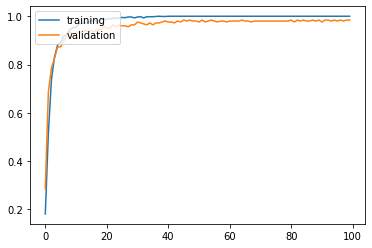

540/540 [==============================] - 0s 20us/step
Test accuracy:  0.970370352268219


In [5]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

#�떒�닚 cnn議곗감 湲덈갑 96% �굹�삩�떎.

In [6]:
#컨벌루션을 다층으로 구성, 4차원에 대하여, 필터수를 50개
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same')) #max pooling을 할때만 줄어든다.
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same')) #stride 다음 윈도우로 넘어갈때, 얼마나 이동할것인가?
    # stride : sampling과 비슷하다. x축으로 몇칸, y축으로 몇칸 뛸건지, 이것도 사실은 4차원, 보통은 1,1로 준다. 채널을 건너뛰면서, 몇개를
    #샘플링할꺼냐?
    
    #padding : same은 곧 zero padding하겠다는 의미
    
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())    
    model.add(Dense(50, activation = 'relu'))    
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [7]:
model = deep_cnn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 50)          22550     
_________________________________________________________________
activation_4 (Activation)    (None, 4, 4, 50)         

In [8]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 19.6 s


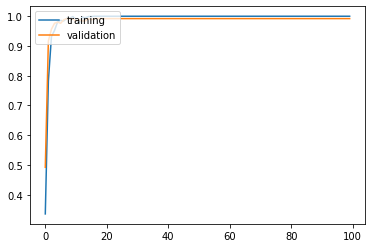

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [10]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])    # �삤�엳�젮 寃곌낵媛� �뼥�뼱吏�

540/540 [==============================] - 0s 89us/step
Test accuracy:  0.9851852059364319


## 2. Deep CNN - 2
- Measures used to ameliorate the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [11]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [12]:
model = deep_cnn_advanced()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_8 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 50)         

In [13]:
%%time #셀의 계산시간을 출력해준다.
#샘플수를 늘리는 방법과, 전이학습 방법 2가지가 있다.
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

UsageError: Can't use statement directly after '%%time'!


In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])             